<a href="https://colab.research.google.com/github/anikanair143/weather_wise_anikanair/blob/main/starter_notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
# Setup and Import packages and libraries

!pip install fetch-my-weather
# !pip install hands-on-ai
!pip install pyinputplus
!pip install matplotlib

# import
# import os
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# import Weather packages
from fetch_my_weather import get_weather

print("Setup complete!")


## 🌤️ Weather Data Functions

In [ ]:
# Define get_weather_data() function here
# from fetch_my_weather import get_weather

def get_weather_data(location, forecast_days=5):
    """
    Retrieve urrent and forecast weather data for the given location.
    """
    try:
        response = get_weather(location)
        current = getattr(response, 'current_weather', None)
        forecast_list = getattr(response, 'forecast', [])

        if current is None:
            print(f"No current weather data for {location}.")
            print("Sample weather data fetched for testing.")
            return {
                'location': location,
                'current': {'temperature': 25, 'condition': 'Sunny', 'humidity': 40},
                'forecast': [
                    {'date': '2025-10-18', 'temperature': 26, 'condition': 'Cloudy', 'precipitation': 10},
                    {'date': '2025-10-19', 'temperature': 24, 'condition': 'Rain', 'precipitation': 80},
                    {'date': '2025-10-20', 'temperature': 23, 'condition': 'Sunny', 'precipitation': 5},
                ]
            }

        weather_data = {
            'location': getattr(response, 'city_name', location),
            'current': {
                'temperature': getattr(current, 'temperature', 'N/A'),
                'condition': getattr(current, 'condition', 'N/A'),
                'humidity': getattr(current, 'humidity', 'N/A')
            },
            'forecast': []
        }

        for day in forecast_list[:forecast_days]:
            weather_data['forecast'].append({
                'date': getattr(day, 'date', 'N/A'),
                'temperature': getattr(day, 'temperature', 'N/A'),
                'condition': getattr(day, 'condition', 'N/A'),
                'precipitation': getattr(day, 'chance_of_rain', 'N/A')
            })

        return weather_data

    except Exception as e:
        print(f"Error fetching weather data for {location}: {e}")
        return None

In [ ]:
# Testing the function
weather = get_weather_data("Perth", forecast_days=3)
print(weather)


## 📊 Visualisation Functions

In [ ]:
# Define create_temperature_visualisation() here

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create a visualisation of temperature data over forecast days.
    Plot a line graph showing temperature trends for upcoming days.
    """
    try:
        dates = [day['date'] for day in weather_data['forecast']]
        temps = [day['temperature'] for day in weather_data['forecast']]

        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(dates, temps, marker='o', linestyle='-', color='orange')
        ax.set_title(f"Temperature Forecast for {weather_data['location']}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Temperature (°C)")
        ax.grid(True)

        if output_type == 'figure':
            return fig
        else:
            plt.show()

    except Exception as e:
        print(f"Error creating temperature visualisation: {e}")

In [ ]:
# create_precipitation_visualisation() here

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create a visualisation of precipitation chances over forecast days.
    Plot a bar chart showing trends for upcoming days.
    """
    try:
        dates = [day['date'] for day in weather_data['forecast']]
        precip = [day.get('precipitation', 0) for day in weather_data['forecast']]

        fig, ax = plt.subplots(figsize=(8,4))
        ax.bar(dates, precip, color='skyblue')
        ax.set_title(f"Precipitation Forecast for {weather_data['location']}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Precipitation Chance (%)")
        ax.grid(axis='y')

        if output_type == 'figure':
            return fig
        else:
            plt.show()

    except Exception as e:
        print(f"Error creating precipitation visualisation: {e}")

In [ ]:
# Testing visualisations here
create_temperature_visualisation(weather)
create_precipitation_visualisation(weather)

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here

def parse_weather_question(question):
    """
    Parse a natural language weather question.
    Interpret a user's question and return an appropriate weather answer.
    """
    # Simple rule-based parsing
    question = question.lower()

    parsed = {
        'location': None,
        'days': 1,
        'attribute': 'temperature'  # default
    }

    # Extract location (assume after 'in')
    if " in " in question:
        parsed['location'] = question.split(" in ")[1].split()[0].capitalize()

    # Extract time period
    if "today" in question:
        parsed['days'] = 1
    elif "tomorrow" in question:
        parsed['days'] = 2
    elif "next" in question:
        parsed['days'] = 3

    # Extract weather attribute
    if "rain" in question or "precipitation" in question:
        parsed['attribute'] = 'precipitation'
    elif "temperature" in question or "hot" in question or "cold" in question:
        parsed['attribute'] = 'temperature'

    return parsed

def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.
    """
    if not weather_data:
        return "Sorry, no weather data available."

    # Determine day index
    day_index = min(parsed_question['days']-1, len(weather_data['forecast'])-1)
    day_weather = weather_data['forecast'][day_index]

    attribute = parsed_question['attribute']
    value = day_weather.get(attribute, "N/A")

    response = f"The {attribute} in {weather_data['location']} on {day_weather['date']} will be {value}"
    if attribute == 'temperature':
        response += "°C."
    elif attribute == 'precipitation':
        response += "% chance of rain."

    return response

In [ ]:
# Testing the NLP functions
question = "What is the rain forecast in Perth tomorrow?"
parsed = parse_weather_question(question)
response = generate_weather_response(parsed, weather)

print("Parsed Question:", parsed)
print("Response:", response)

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus here

def display_menu():
    import pyinputplus as pyip

    while True:
        print("\n🌦️ Welcome to WeatherWise")
        print("1. View current weather and forecast")
        print("2. Visualise temperature trends")
        print("3. Visualise precipitation chances")
        print("4. Ask a weather question!")
        print("5. Exit")

        choice = pyip.inputInt("Enter your choice (1-5): ", min=1, max=5)

        if choice == 1:
            location = pyip.inputStr("Enter city name: ")
            weather_data = get_weather_data(location)

            if weather_data:
                print(f"\n🌤️ Current weather in {weather_data['location']}:")
                print(f"Temperature: {weather_data['current']['temperature']}°C")
                print(f"Condition: {weather_data['current']['condition']}")
                print(f"Humidity: {weather_data['current']['humidity']}%")

                print("\n📅 Forecast:")
                for day in weather_data['forecast']:
                    print(f"{day['date']}: {day['temperature']}°C, {day['condition']}, {day['precipitation']}% chance of rain")
            else:
                print(f"Could not fetch weather data for {location}. Please try another city.")

        elif choice == 2:
            if 'weather_data' in locals() and weather_data:
                create_temperature_visualisation(weather_data)
            else:
                print("Please fetch weather data first (Option 1).")

        elif choice == 3:
            if 'weather_data' in locals() and weather_data:
                create_precipitation_visualisation(weather_data)
            else:
                print("Please fetch weather data first (Option 1).")

        elif choice == 4:
            if 'weather_data' in locals() and weather_data:
                question = pyip.inputStr("Ask your weather question: ")
                parsed = parse_weather_question(question)
                response = generate_weather_response(parsed, weather_data)
                print("\n" + response)
            else:
                print("Please fetch weather data first (Option 1).")

        elif choice == 5:
            print("Exiting WeatherWise. Goodbye! 🌤️")
            break

## 🧩 Main Application Logic


🌦️ Welcome to WeatherWise
1. View current weather and forecast
2. Visualise temperature trends
3. Visualise precipitation chances
4. Ask a weather question!
5. Exit
Enter your choice (1-5): 1
Enter city name: perth
No current weather data for perth.
Sample weather data fetched for testing.

🌤️ Current weather in perth:
Temperature: 25°C
Condition: Sunny
Humidity: 40%

📅 Forecast:
2025-10-18: 26°C, Cloudy, 10% chance of rain
2025-10-19: 24°C, Rain, 80% chance of rain
2025-10-20: 23°C, Sunny, 5% chance of rain

🌦️ Welcome to WeatherWise
1. View current weather and forecast
2. Visualise temperature trends
3. Visualise precipitation chances
4. Ask a weather question!
5. Exit
Enter your choice (1-5): 2


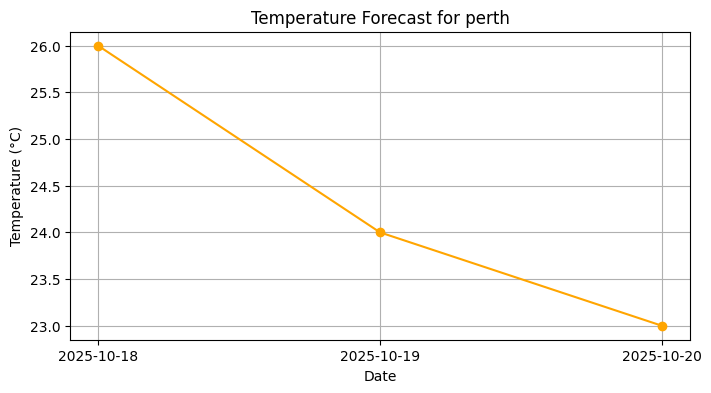


🌦️ Welcome to WeatherWise
1. View current weather and forecast
2. Visualise temperature trends
3. Visualise precipitation chances
4. Ask a weather question!
5. Exit
Enter your choice (1-5): 

In [ ]:
# Run the WeatherWise menu
display_menu()

## 🧪 Testing and Examples

In [ ]:
# ===============================
#  Testing & Examples
# ===============================

print("=== 🧪 Testing get_weather_data() ===")
sample_weather = get_weather_data("Perth", forecast_days=3)

if sample_weather:
    print(f"Location: {sample_weather['location']}")
    print(f"Current Temp: {sample_weather['current']['temperature']}°C")
    print(f"Condition: {sample_weather['current']['condition']}")
    print(f"Humidity: {sample_weather['current']['humidity']}%")
else:
    print("Weather data not available. Using fallback sample.")

# ✅ Forecast Display
if sample_weather and 'forecast' in sample_weather:
    print("\n=== Forecast ===")
    for day in sample_weather['forecast']:
        print(f"{day['date']}: {day['temperature']}°C, {day['condition']}")
else:
    print("No forecast data available for display.")

# ✅ Temperature Visualisation Test
print("\n=== Testing Temperature Visualisation ===")
if sample_weather:
    create_temperature_visualisation(sample_weather)
else:
    print("Skipping temperature visualisation (no data)")

# ✅ Precipitation Visualisation Test
print("\n=== Testing Precipitation Visualisation ===")
if sample_weather:
    create_precipitation_visualisation(sample_weather)
else:
    print("Skipping precipitation visualisation (no data)")

# ✅ NLP Stub Test
print("\n=== Testing NLP Response ===")
test_question = "Will it rain today?"
parsed_question = parse_weather_question(test_question)
response_text = generate_weather_response(parsed_question, sample_weather) if sample_weather else "No weather data to answer."
print(f"User Question: {test_question}")
print(f"AI Response: {response_text}")

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.